In [32]:
# Goal of the project is to apply ML to real data

# Step 1: just plot the data
# Step 2: which task? Supervised Learning!
# Step 3: train and test a few methods

# Comments on different algorithms, expenses, difficulties, findings?
# Hint: start with simple classification  (SoftMax)

In [33]:
# Here I want to use a CNN for the same simplified classification task that I did already with Logistic Regression

In [34]:
# Loading the data

# What are the GalaxyIDs? I can read them from the first column of the training_solutions file

import skimage
from skimage import data
from skimage import io

import numpy as np
import os
import csv

# I read the file and create the list of IDs as well as the list of labels
with open("training_solutions_rev1.csv", 'r') as f: 
    reader = csv.reader(f, delimiter=",")
    train_ids = []
    y = []
    for k, line in enumerate(reader):
        if k == 0: continue # skip header
        train_ids.append(int(line[0]))
        y.append(line[1:])
        
train_ids = np.array(train_ids) # I save the IDs in this numpy array
my_train_ids = train_ids[0:800] # I want to work with less training data for computational cost reasons
my_valid_ids = train_ids[800:900] # galaxies IDs for my validation test (to chooose between my models)
my_test_ids = train_ids[900:1000] # These I choose to be the galaxies IDs for my final-test

# same split for the labels
y = np.asarray(y, dtype=float)  #change type of elements from string to float!
y_train = y[0:1000]
y_valid = y[8000:8500]
y_test = y[1500:2000]

# same split for the data points
x_train = []
x_valid = []
x_test = []
for ID in my_train_ids:
    filename = 'images_training_rev1/' + str(ID) + '.jpg'
    x_train.append(io.imread(filename))
for ID in my_valid_ids:
    filename = 'images_training_rev1/' + str(ID) + '.jpg'
    x_valid.append(io.imread(filename))
for ID in my_test_ids:
    filename = 'images_training_rev1/' + str(ID) + '.jpg'
    x_test.append(io.imread(filename))
x_train = np.array(x_train)
x_valid = np.array(x_valid)
x_test = np.array(x_test)

In [35]:
# Each data point is an image of 424x424 pixels, 
# where each pixel is a set of 3 numbers giving the RGB intensities

x_train = np.asarray(x_train, dtype=float)
x_valid = np.asarray(x_valid, dtype=float)
x_test = np.asarray(x_test, dtype=float)

print('The number of values characterizing each image is:')
print(424*424*3)
print('The shape of each data point is:')
print(x_train[0].shape)

#reducing number of classes to three...
my_ys = []
for p in y:
    my_y = []
    my_y.append(p[0])
    my_y.append(p[1])
    my_y.append(p[2])
    my_y = np.asarray(my_y, dtype=float)
    my_ys.append(my_y)
    
my_ys = np.asarray(my_ys, dtype=float)

# Changing labels from soft to hard... 

my_ys_hard = []
for distribution in my_ys:
    label = distribution.argmax()
    my_ys_hard.append(label)
    
my_ys_hard = np.asarray(my_ys_hard)

my_train = my_ys_hard[0:800]
my_valid = my_ys_hard[800:900]
my_test = my_ys_hard[900:1000]

print('The shapes of the training points and of the labels are:')
print(x_train.shape, my_train.shape)

The number of values characterizing each image is:
539328
The shape of each data point is:
(424, 424, 3)
The shapes of the training points and of the labels are:
(800, 424, 424, 3) (800,)


In [36]:
# Comments:
# 1. I can use COLAB, a google notebook that connects to a GPU in the worlds...

In [37]:
import tensorflow as tf
print(tf.__version__) 

2.0.0


In [38]:
# I want to construct a CNN because the images have a lot of pixels
# implying a lot of weigths to learn...
# It is smart to use filters (convolutional layers) to detect patterns
# e.g. spiral arms, bars, round shapes, edge-on disks, bulges, rings, exc...

In [39]:
#Normalization generally leads to faster learning/convergence - a good practice!
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_valid = tf.keras.utils.normalize(x_valid, axis=1)

#We define a linear-style neural network, one of the simplest models
model = tf.keras.models.Sequential()

In [40]:
# 1st convolution layer with 10 large filters 
model.add(tf.keras.layers.Conv2D(10,(7,7),input_shape=(424, 424, 3)))

# 1st pooling layer to coarse-grain by a factor of 4 (get the size of a galaxy)
model.add(tf.keras.layers.MaxPooling2D(pool_size=(4,4)))

# 2nd convolution layer with 10 smaller filters
model.add(tf.keras.layers.Conv2D(10,(5,5),input_shape=(106, 106, 3)))

# 2nd pooling layer to coarse-grain by a factor of 2
model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

In [41]:
# Flatten the input in 1D array 
model.add(tf.keras.layers.Flatten())

# Dense layer with 128 neurons
model.add(tf.keras.layers.Dense(128,activation = tf.nn.relu))

# For the final layer, the output layer, we transform the output from the previous layer
# to a probability distribution across 3 classes
last_layer = 3
model.add(tf.keras.layers.Dense(last_layer,activation = tf.nn.softmax))

# I choose the loss function and the optimizer ('adam' is a variant of SGD)
model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])

In [42]:
model.fit(x_train,my_train,epochs = 4)

Train on 800 samples
Epoch 1/4
800/800 [==============================] - 26s 33ms/sample - loss: 0.7102 - accuracy: 0.5562
Epoch 2/4
800/800 [==============================] - 22s 28ms/sample - loss: 0.5444 - accuracy: 0.7312
Epoch 3/4
800/800 [==============================] - 21s 27ms/sample - loss: 0.4066 - accuracy: 0.8263
Epoch 4/4
800/800 [==============================] - 23s 28ms/sample - loss: 0.2426 - accuracy: 0.9337


In [43]:
# CNN took 20s per epoch with 800 training points 

# Improvable with modifications below and more epochs and training points

# Improvements that I could do:
# 1) crop the images with pytorch 
        # funzione gia' fatta in transforms center_crop
# 2) use weights for imbalanced classes
# 3) add more layers, windows max 7x7

In [44]:
#Let's evaluate the model
#.evaluate() returns the loss and metrics (accuracy for us) for the test sample
val_loss, val_acc = model.evaluate(x_valid, my_valid)
print(val_loss, val_acc)

100/1 [=================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

In [45]:
# 68% accuracy a few percent less than Logistic regressor
# In a previous fitting with the same CNN I obtained
# 75% accuracy not much better than Logistic Regression

# why such a change?

In [46]:
#Saves the model in a folder in the working directory
model.save("CNN_Galaxies_simple_classification")

INFO:tensorflow:Assets written to: CNN_Galaxies_simple_classification/assets


Output probabilities + Predicted value
[6.3693002e-02 9.3630695e-01 2.3883379e-10]
1
True value
1


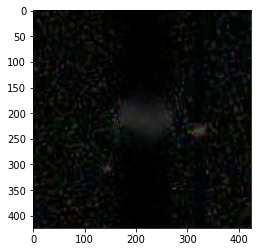

In [47]:
#Load the model
my_model = tf.keras.models.load_model("CNN_Galaxies_simple_classification")

#Test the model
predictions = my_model.predict(x_valid)

#For a given index...
index = 1

#What do we predict?
print('Output probabilities + Predicted value')
print(predictions[index])
print(np.argmax(predictions[index]))

#What is the true value?
print('True value')
print(my_valid[index])

import matplotlib.pyplot as plt
plt.imshow(x_valid[index])
plt.show()